In [1]:
import os
import numpy as np
import pandas as pd
import csv
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pickle

In [5]:
#allstitch contains inchikey and genes location/interaction score
allstitch = pd.read_csv (r'AllSTITCH_multi.csv')
#coumpounds contains compound names and inchikey
compounds = pd.read_csv(r'compounds_full.csv')
#drugs contains drug tagert genes location
drug = pd.read_csv(r'matrix_drug_targets_high_conf.csv')
food_compounds = compounds[compounds['Primary_ID'].str[0:3].isin(['FDB'])]
alls_food = allstitch.loc[allstitch.InChIKey.isin(food_compounds['InChIKey'])]
alls_food.to_csv('Test.csv')
#inchikey and genes location/interaction for food only
data = pd.read_csv('Test.csv')
 
    

#food location numbers
alls_food_split = alls_food['Genes'].apply(lambda x: pd.Series(x.split('|')))

In [19]:
#convert to gene target location file (0/1)
lst_post = []
for x in range(0, 7962):
    loc = np.array([0]*20256)
    list1 = []
    for y in alls_food_split.iloc[x]:
        if pd.isna([y]) == False:
            i = int(y.split(':')[0])
            list1.append(i)
    loc[list1] = 1
    lst_post.append(loc)
df = pd.DataFrame(lst_post)

KeyboardInterrupt: 

In [199]:
df = pd.read_csv (r'df.csv')

In [ ]:
#selecting interaction score greater than 700 
index = []

for x in range(0, 7962):
    list1 = []
    for y in alls_food_split.iloc[x]:
        if pd.isna([y]) == False:
            j = int(y.split(':')[0])
            i = int(y.split(':')[1])
            if i >= 700:
                list1.append(j)
    index.append(list1)

In [119]:
with open("index.txt", 'rb') as f:
    index = pickle.load(f)

In [18]:
#replacing id with food name
foodnameindex = alls_food_split.index
y = [i for i,x in enumerate(index) if x !=[] ]
y
foodnameselect = foodnameindex[y]
foodkey = alls_food.loc[foodnameselect]['InChIKey']
foodselname = food_compounds.loc[food_compounds['InChIKey'].isin(foodkey)]
foodselname = foodselname.set_index('InChIKey').tolist()
foodselname=foodselname.loc[foodkey]
foodselnamelist=foodselname['Name'].tolist()

In [120]:
indexfood = [x for x in index if x != []]

In [137]:
notempty = [i for i,x in enumerate(index)if x]

[0,
 1,
 14,
 16,
 17,
 18,
 25,
 26,
 30,
 32,
 33,
 37,
 42,
 43,
 47,
 53,
 54,
 55,
 57,
 58,
 61,
 64,
 66,
 70,
 76,
 79,
 81,
 82,
 85,
 86,
 87,
 88,
 89,
 91,
 93,
 94,
 95,
 100,
 103,
 106,
 108,
 111,
 117,
 120,
 121,
 123,
 125,
 126,
 127,
 128,
 134,
 136,
 139,
 140,
 144,
 147,
 148,
 151,
 152,
 159,
 160,
 161,
 165,
 170,
 172,
 177,
 179,
 180,
 181,
 182,
 184,
 189,
 190,
 191,
 197,
 198,
 201,
 202,
 205,
 206,
 211,
 214,
 217,
 218,
 219,
 221,
 223,
 227,
 228,
 231,
 234,
 237,
 238,
 239,
 240,
 241,
 245,
 248,
 251,
 255,
 258,
 259,
 262,
 267,
 268,
 274,
 276,
 284,
 287,
 289,
 292,
 297,
 302,
 304,
 307,
 308,
 312,
 314,
 318,
 319,
 320,
 321,
 324,
 325,
 326,
 337,
 338,
 339,
 341,
 344,
 348,
 350,
 352,
 353,
 355,
 356,
 357,
 360,
 361,
 362,
 364,
 365,
 366,
 370,
 374,
 375,
 377,
 379,
 381,
 382,
 383,
 385,
 389,
 392,
 396,
 398,
 413,
 415,
 418,
 419,
 425,
 426,
 428,
 430,
 434,
 436,
 438,
 439,
 441,
 449,
 450,
 451,
 452,
 

In [138]:
#preparing drug file
drug = drug.iloc[: , 1:]
drug = drug.T

In [ ]:
#drug gene numbering
indexdrug = []

for x in range(0, 37):
    list1 = []
    for y in range (0,20256): 
        if drug.iat[x,y] == 1:
            list1.append(y)

    indexdrug.append(list1)

/home/ez120/anaconda3/lib/python3.8/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


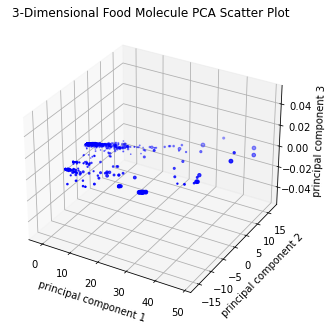

In [206]:
#PCA
from sklearn.decomposition import PCA
#x = StandardScaler().fit_transform(df)
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2','principal component 3'])
finalDf = principalDf
fig = plt.figure()
ax = Axes3D(fig)
plt.scatter(finalDf['principal component 1'],finalDf['principal component 2'],finalDf['principal component 3'],c = 'blue')
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
ax.set_zlabel('principal component 3')
plt.title('3-Dimensional Food Molecule PCA Scatter Plot')

plt.savefig('3-Dimensional Food Molecule PCA Scatter Plot.png',dpi=300, bbox_inches = "tight")

In [201]:
#PCA
from sklearn.decomposition import PCA
#x = StandardScaler().fit_transform(df)
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(df.iloc[notempty])
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2','principal component 3'])
finalDf = principalDf
fig = plt.figure()
ax = Axes3D(fig)

plt.title('3-Dimensional Food Molecule PCA Scatter Plot')
plt.scatter(finalDf['principal component 1'],finalDf['principal component 2'],finalDf['principal component 3'],c = 'blue'
plt.savefig("3-Dimensional Food Molecule PCA Scatter Plot.png")
plt.show()

SyntaxError: invalid syntax (<ipython-input-201-562e34724e30>, line 13)

In [159]:
finalDf.sort_values(by='principal component 1',ascending = False)[0:9]

,principal component 1,principal component 2,principal component 3
5331,48.352474,16.558031,-0.700053
1712,47.587709,13.035704,13.256693
2908,45.622957,15.661928,13.547034
7217,43.246239,8.562831,13.403150
6966,43.166076,8.527057,13.392664
6425,41.653317,11.914252,4.969846
2996,41.653317,11.914252,4.969846
7086,40.422354,14.466890,-8.168791
4736,40.284958,14.459021,-8.191382


In [160]:
pca.explained_variance_ratio_

array([0.11135411, 0.02590024, 0.02248252])

In [188]:
for i in range(100,110):
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(df)  
    print(pca.explained_variance_ratio_.sum())

0.4993873178841521
0.50101026236492
0.5023967345081085
0.5039651442533186
0.505286797998048
0.5067268435603502
0.5081871799368736
0.5095759263089166
0.510990361421729


KeyboardInterrupt: 

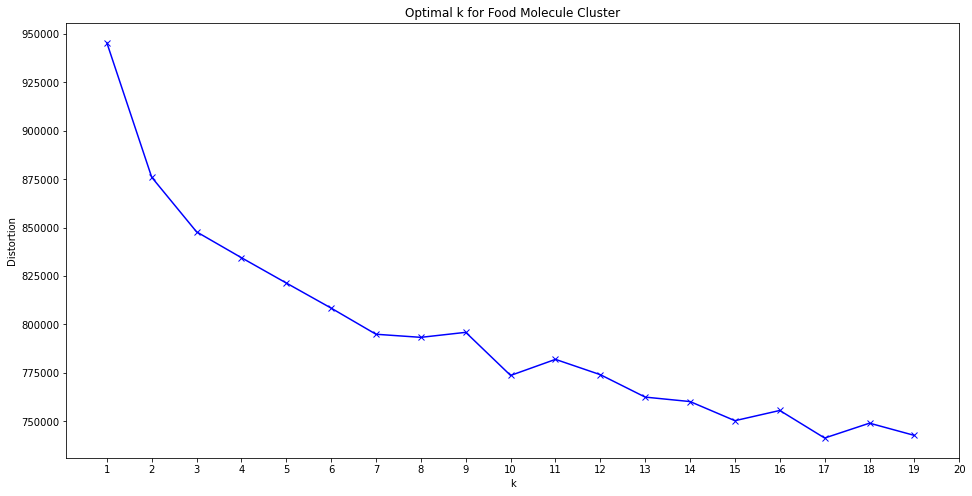

In [186]:
#kmean elbow method
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Optimal k for Food Molecule Cluster')
plt.savefig("Optimal k for Food Molecule Cluster.png")
plt.xticks(range(1,21))
plt.show()

In [164]:
foodmol_tag.count_values

AttributeError: 'DataFrame' object has no attribute 'count_values'

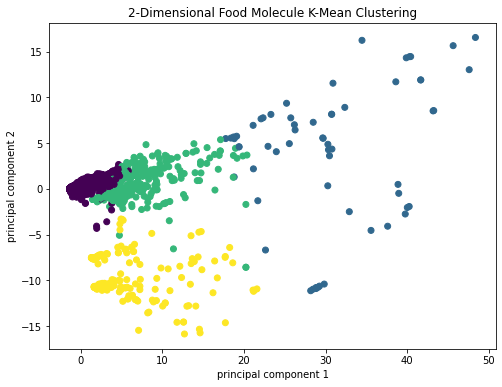

In [237]:
#kmean
kmeans = KMeans(n_clusters = 4, random_state=0).fit(df)
kmeans.fit(df)
y_kmeans = kmeans.predict(df)

test=np.array(principalDf)
model = KMeans(n_clusters = 4)
model.fit(test)
labels = model.predict(test)

xs = test[:,0]
ys = test[:,1]

plt.figure(figsize=(8,6))
plt.scatter(xs,ys,c=labels)
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.title('2-Dimensional Food Molecule K-Mean Clustering')
plt.savefig("Food Molecule 4 Clusters 2D.png",dpi=300,bbox_inches = "tight")
plt.show()

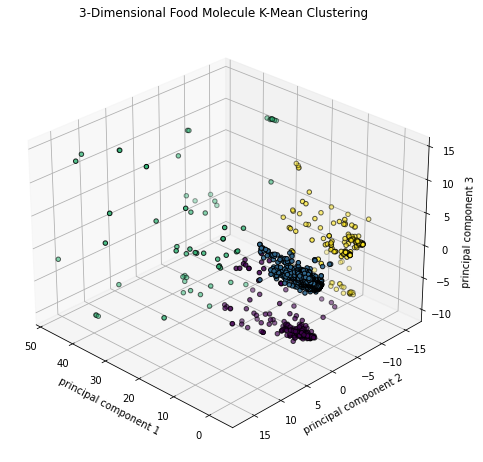

In [214]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=28, azim=134)
ax.scatter(test[:, 0], test[:, 1], test[:, 2],c=labels, edgecolor='k')

ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
ax.set_zlabel('principal component 3')
ax.set_title('3-Dimensional Food Molecule K-Mean Clustering')
#plt.savefig("Food Molecule Cluster elev=30, azim=134.png",dpi=300,bbox_inches = "tight")

In [242]:
pd.DataFrame(labels).value_counts()

0    7393
2     330
3     177
1      62
dtype: int64

In [267]:
df2 = df
df2['total']=df2.iloc[:,0:20255].sum(axis=1)
df2[labels==1].total.mean()

3108.0967741935483

In [264]:
df2[labels==2].total.mean()

645.6545454545454

In [265]:
df2[labels==3].total.mean()

577.4067796610169

In [266]:
df2[labels==0].total.mean()

61.392398214527255

In [261]:
from scipy.stats import ttest_ind

cat1 = df2[labels==0].total
cat2 = df2[labels==1].total
cat3 = df2[labels==2].total
cat4 = df2[labels==3].total

ttest_ind(cat2, cat4)

Ttest_indResult(statistic=22.40811215266509, pvalue=1.8277693989302622e-60)

In [163]:
foodmol_tag = pd.DataFrame(food_compounds['Primary_ID'])
foodmol_tag['labels']=labels

foodmol_tag['labels'].value_counts()
#foodmol_tag.set_index('Primary_ID')

0    7393
3     330
2     177
1      62
Name: labels, dtype: int64

In [166]:
pool = pd.read_csv(r'top112genefd.csv',index_col = 0)
df1 = pd.read_csv(r'compounds_full.csv')
foodid = []
for i,row in pool.iterrows():    
    name = pool.food[i] 
    foodid.append(df1[df1.Name == name].iat[0,0])
        
foodid
foodmol_tag[foodmol_tag.Primary_ID.isin(foodid)]['labels'].value_counts()


0    84
3     6
1     1
2     1
Name: labels, dtype: int64

In [121]:
indexfood

[[5926, 11801],
 [7627, 1616],
 [16521],
 [13143, 5631, 2613, 129, 14538, 7349, 11801, 13719],
 [11932, 3982, 7349],
 [12378, 5812, 2240],
 [11178],
 [10406],
 [17857,
  14274,
  1629,
  14236,
  12559,
  9855,
  7349,
  17502,
  9143,
  11312,
  12268,
  496,
  496,
  14236,
  11536,
  2210,
  283,
  7108,
  3361,
  12477,
  18125,
  5814,
  11423,
  14306,
  2003,
  7349,
  7805,
  16230,
  14242,
  6715,
  11361,
  0,
  9855,
  12537,
  15635,
  17177,
  15635,
  14274,
  11312,
  14978,
  17618,
  17177,
  8975,
  6131,
  11801,
  227,
  7108,
  1629,
  5434,
  14411,
  8975,
  13674,
  3556,
  11629,
  6131,
  15828,
  2083,
  16639],
 [9393,
  4506,
  4506,
  15067,
  15067,
  19184,
  11804,
  11804,
  13060,
  9393,
  14398,
  19184,
  13656,
  14398,
  10515,
  10515],
 [18691, 6927],
 [12092],
 [18523,
  12236,
  532,
  509,
  16508,
  16508,
  1460,
  2426,
  12236,
  425,
  16888,
  2426,
  1460,
  18956,
  18956,
  532,
  425,
  12259,
  15834,
  12259],
 [15083, 15469, 68

In [165]:
foodmol_tag[foodmol_tag.Primary_ID == 'FDB022259']

,Primary_ID,labels
3828,FDB022259,0


In [ ]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=28, azim=134)
ax.scatter(test[:, 0], test[:, 1], test[:, 2],c=labels, edgecolor='k')

#plt.savefig("Food Molecule 6 Clusters elev=30, azim=134.png")
plt.show()

In [ ]:
import torch
import numpy as np

#Loads gene-pathway (GO) connections
gene_to_pathway = torch.load('pooling_to_pathway_edge_index.py')

#dict from gene index to pathway index
n_pathways = len(set(gene_to_pathway[1,:]))
gene_to_pathway = gene_to_pathway.numpy()
pathway_list = gene_to_pathway[1,:].tolist()
pathway_list.sort()
pathway_list = set(pathway_list)
dict_reindex = dict(zip(pathway_list, range(n_pathways)))

gene_to_pathway[1,:] = [dict_reindex[e] for e in gene_to_pathway[1,:]]

go_nodes = {}
for gene_index, pathway_index in zip(gene_to_pathway[0, :], gene_to_pathway[1,:]):
	if gene_index in go_nodes:
		go_nodes[gene_index][pathway_index] = 1
	else:
		go_nodes[gene_index] = np.zeros(n_pathways)
		go_nodes[gene_index][pathway_index] = 1

#Function to calculate overlap of GO terms given 2 lists of genes
def calculate_overlap_go(nodes_from, nodes_to, go_nodes, n_pathways):
	multiset_from = [go_nodes[i] if i in go_nodes else np.zeros(n_pathways) for i in nodes_from]
	multiset_to = [go_nodes[i] if i in go_nodes else np.zeros(n_pathways) for i in nodes_to]
	multiset_from = np.sum(multiset_from, 0)
	multiset_to = np.sum(multiset_to, 0)
	mins = np.min(np.concatenate([multiset_from.reshape(1, -1), multiset_to.reshape(1, -1)], 0), 0)
	maxs = np.max(np.concatenate([multiset_from.reshape(1, -1), multiset_to.reshape(1, -1)], 0), 0)
	if np.sum(maxs) == 0:
		return 0
	else:
		return np.sum(mins) / np.sum(maxs)

#Function to calculate overlap of genes given 2 lists of genes
def calculate_overlap_genes(nodes_from, nodes_to):
	nodes_from = set(nodes_from)
	nodes_to = set(nodes_to)
	ov = np.mean([len(nodes_from.intersection(nodes_to)) / len(nodes_from) , len(nodes_from.intersection(nodes_to)) / len(nodes_to)])
	return ov


In [ ]:
result = []
for i in indexfood:
    for j in indexdrug:
        u = calculate_overlap_go(i, j, go_nodes, n_pathways)
        result.append(u)
result2 = []
for i in indexfood:
    for j in indexdrug:
        u = calculate_overlap_genes(i, j)
        result2.append(u)

comb = []
for i in range(len(indexfood)):
    foodname = [foodselnamelist[i]]
    for j in range(len(indexdrug)):
        drugname = drug.index[j]
        k = foodname + str(" and ")+ drugname
        comb.append(k)
        
resultdf = [comb, result, result2]
resultdf = pd.DataFrame(resultdf)
resultdf.index = ["combination","function","gene"]
resultdf=resultdf.T
resultdf.sort_values(by = 'function', ascending=False).iloc[:20,]
resultdf.sort_values(by = 'gene', ascending=False).iloc[:20,]
resultdf.sort_values(by = ['function','gene'], ascending=False).iloc[:20,]

In [ ]:
#lab determined combination
with open('cellline.pickle','rb') as f:
    data_1 = pickle.load(f)
    f1 = pd.DataFrame(data_1)
    f1.to_csv(r'cellline.csv')
    
cel = pd.read_csv (r'matrix_cell_line_mutations.csv')
cel = cel.iloc[: , 1:]
cel = cel.T
selectcel=cel.loc[["HCT116","A549"]]
celname=list(cel.index)


combdf = pd.read_csv('drugcomb_dataset_v2_oneil_combinations_info.csv', index_col=0)

gene_score, function_score = [], []

for i, row in combdf.iterrows():
    drug1name = row['drug_id']
    drug2name = row['drug_id.1']
    drug1genes = drug.T[drug.T[drug1name] > 0].index
    drug2genes = drug.T[drug.T[drug2name] > 0].index
    genes = set(drug1genes).union(set(drug2genes))
    cellname = row['cell_name']
    cellgenes = cel[cel[cellname] > 0].index
    u = calculate_overlap_go(genes, cellgenes, go_nodes, n_pathways)
    v = calculate_overlap_genes(genes, cellgenes)
    gene_score.append(v)
    function_score.append(u)
combdf['gene_score']= gene_score
combdf['function_score']= function_score

combdf.columns = ['drug1','drug2','cell line','synergy_zip','gene','function']
combdf.to_csv('/data/ez120/Project2/interactomo_drugs/combinatorial_therapeutics/baseline/datapoints.csv')